# Task 1

In [4]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy.fft import fft, fftfreq, ifft

In [5]:
file_path_t1 = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_1/T1_audio.wav"

In [6]:
signal, sampling_rate = librosa.load(file_path_t1, sr=None)

In [7]:
print(f"Sampling Rate: {sampling_rate} Hz")

duration = librosa.get_duration(y=signal, sr=sampling_rate)

print(f"Duration: {duration:.2f} seconds")
print(f"Signal Shape: {signal.shape}")

Sampling Rate: 24000 Hz
Duration: 26.52 seconds
Signal Shape: (636480,)


In [8]:
# Reversing the audio file
new_signal = np.flip(signal)

In [9]:
# Speed up 1-D sound array
signal_fast = librosa.effects.time_stretch(new_signal, rate=2)

In [10]:
# Writing 1-D sound array into an audio file
sf.write('/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_1/reversedaudio.wav', signal_fast, sampling_rate)

In [11]:
ipd.Audio('/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_1/reversedaudio.wav')

> Hidden Phrase: 67.9222° N, 26.5046° E -> Lapland

# Task 2

#### Spectogram
- A spectrogram is a visual representation of the spectrum of frequencies of sound as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.'.stft' converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.

In [12]:
file_path_t2a = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_2/T2_audio_a.wav"
file_path_t2b = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_2/T2_audio_b.wav"
file_path_t2c = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_2/T2_audio_c.wav"
file_path_t2d = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_2/T2_audio_d.wav"

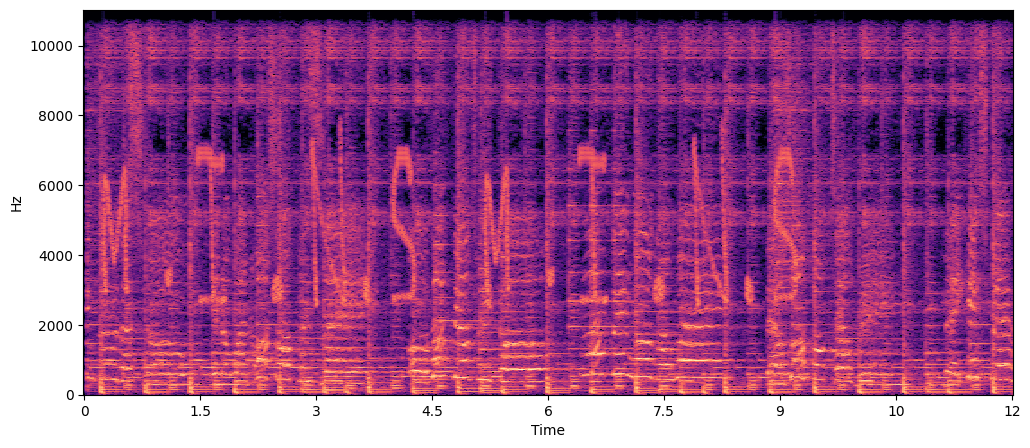

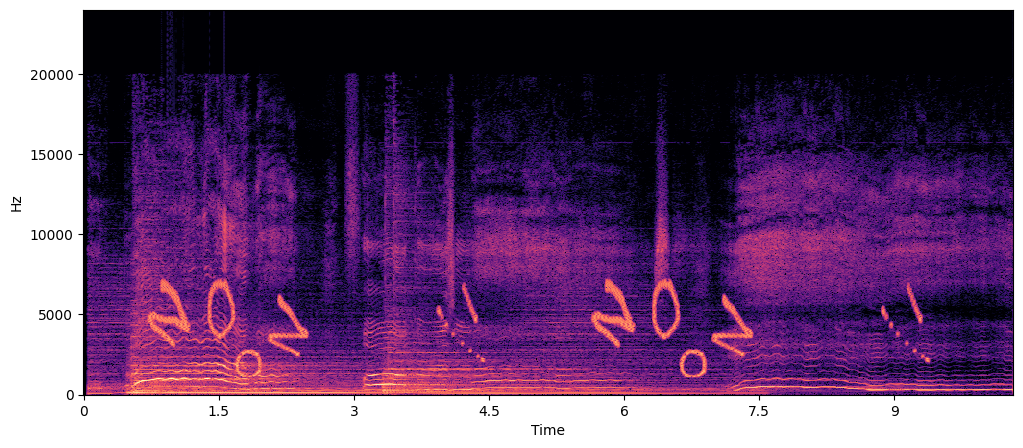

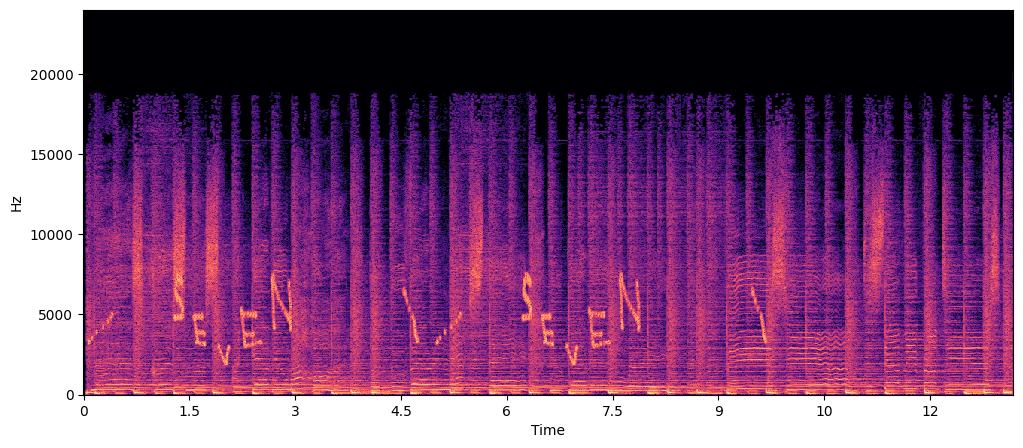

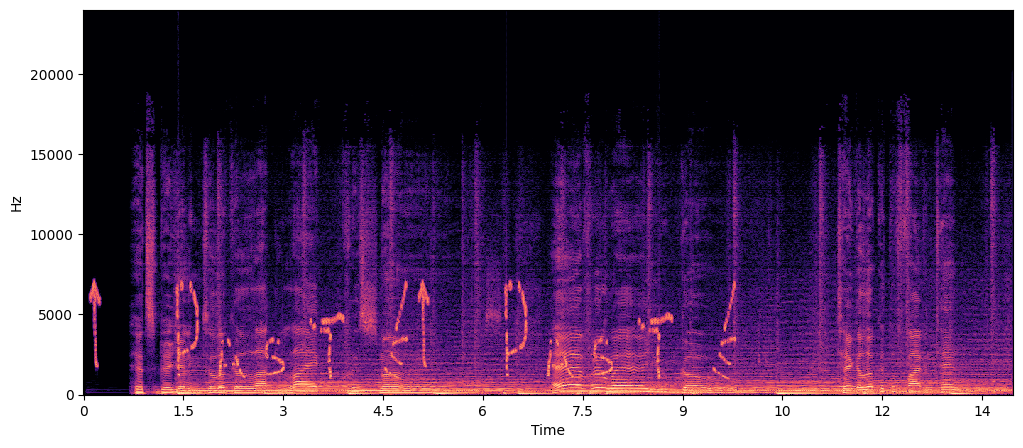

In [13]:
audio_files = [file_path_t2a, file_path_t2b, file_path_t2c, file_path_t2d]


for audio in audio_files:
    
    signal, sampling_rate = librosa.load(audio, sr=None)
    
    X = librosa.stft(signal)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 5))
    
    # Set cmap to 'magma' to increase the contrast of spectrogram
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz', cmap='magma')

plt.show()

> Hidden Time: 7 mins past noon -> 12:07

# Task 3

In [14]:
file_path_t3 = "/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_3/C.Noisy_Voice.wav"

In [15]:
signal, sampling_rate = librosa.load(file_path_t3, sr=None)

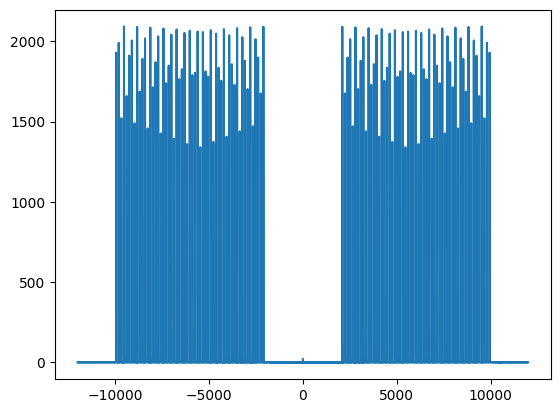

In [16]:
duration = librosa.get_duration(y=signal, sr=sampling_rate)

N = sampling_rate * duration

yf = fft(signal)
xf = fftfreq(int(N), 1 / sampling_rate)

plt.plot(xf, np.abs(yf))
plt.show()

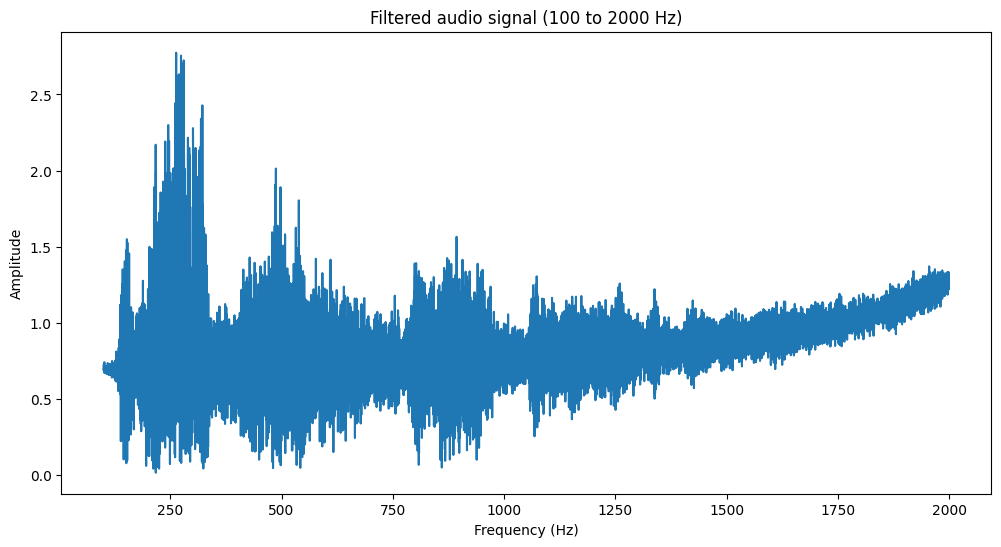

In [17]:
# Define the frequency range of interest
low_freq = 100  # Hz
high_freq = 2000  # Hz

# Find indices corresponding to the specified frequency range
filter_range = np.where((xf >= low_freq) & (xf <= high_freq))

# Extract the relevant frequency components
filtered_yf = np.abs(yf)[filter_range]

# Plot the filtered signal in the frequency domain
plt.figure(figsize=(12, 6))
plt.plot(xf[filter_range], filtered_yf)
plt.title(f"Filtered audio signal ({low_freq} to {high_freq} Hz)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

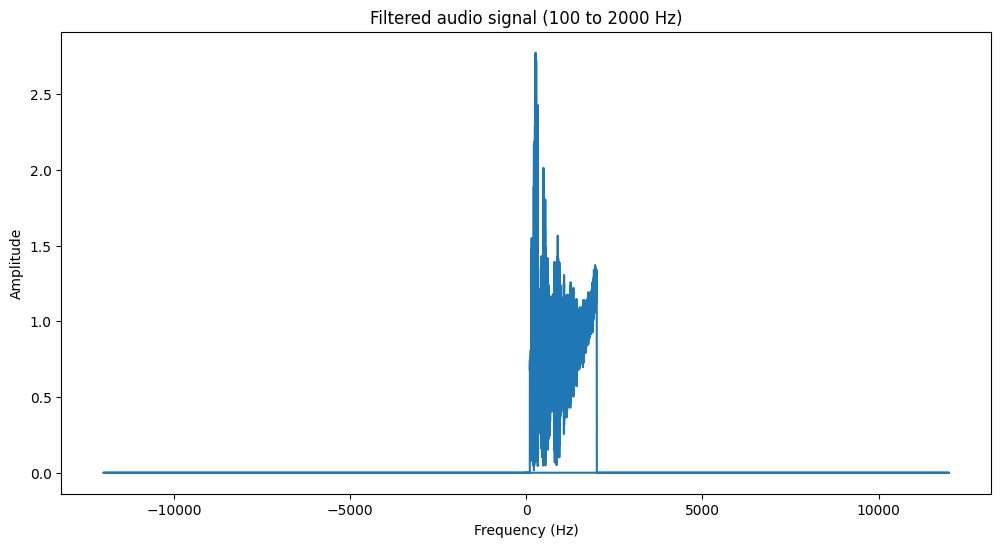

In [18]:
# Create a mask to filter frequencies outside the range
mask = (xf >= low_freq) & (xf <= high_freq)

filtered_fft = yf.copy()
filtered_fft[~mask] = 0

# Account for complex conjugate symmetry for real-valued signals
mask_low = (xf > 0) & (xf < low_freq)
mask_high = xf > high_freq

filtered_fft[mask_low] = np.conj(filtered_fft[mask_low])
filtered_fft[mask_high] = np.conj(filtered_fft[mask_high])

# Plot the filtered signal in the frequency domain
plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(filtered_fft))
plt.title(f"Filtered audio signal ({low_freq} to {high_freq} Hz)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [19]:
filtered_fft_audio = ifft(filtered_fft).real
ipd.Audio(filtered_fft_audio, rate=sampling_rate)

In [20]:
def write_audio_file(filename, data, samplerate):
    sf.write(file=filename, data=data, samplerate=samplerate)

def increase_loudness(audio, gain=2):
    max_amplitude = np.max(np.abs(audio))
    normalized_audio = gain * audio / max_amplitude
    scaled_audio = np.int16(normalized_audio * 32767)
    return scaled_audio

def transcribe_audio(model, audio_file):
    result = model.transcribe(audio_file)
    return result["text"]

In [21]:
output_path = '/Users/marcusyeo/Desktop/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/Task_3/filtered_audio.wav'
write_audio_file(output_path, filtered_fft_audio, sampling_rate)

In [22]:
amplified_path = 'Task_3/filtered_audio_loud.wav'
amplified_audio = increase_loudness(filtered_fft_audio, gain=1.5)
write_audio_file(amplified_path, amplified_audio, sampling_rate)

In [2]:
import whisper

In [3]:
model = whisper.load_model("large-v2")

In [23]:
transcription_result = transcribe_audio(model, amplified_path)
print(transcription_result)

/Users/marcusyeo/miniconda3/lib/python3.9/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Senin için buradayım. Beni içeri al. Sadece birbirimize sahibiz. Sadece sen ve ben. Ne yapacağız? Kardan adam yapmak ister misin?


> Hidden Word: "Senin için buradayım. Beni içeri al. Sadece birbirimize sahibiz. Sadece sen ve ben. Ne yapacağız? Kardan adam yapmak ister misin?" is being translated to "I am here for you. Let me in. We only have each other. Just you and me. What shall we do? Would you like to build a snowman?" Since the code word is an object, hence the word should be "snowman"!